In [64]:
#Michał Wiśniewski, nr 141335
#Informatyka I1


In [65]:
#Używany zbiór danych pochodzi z Kaggle
#Link - https://www.kaggle.com/leonardopena/top-spotify-songs-from-20102019-by-year

#Jest to baza prawie 600 utworów z bazy danych Spotify, najpopularniejszych w minionej dekadzie z następującymi parametrami:
#tytuł
#artysta
#rok
#gatunek
#bpm (tempo utworu, ilość uderzeń na minutę)
#Energy (parametr wyliczany za pomocą algorytmu Spotify - im wyższa, tym wyższa energetyczność utworu)
#Danceability (parametr wyliczany za pomocą algorytmu Spotify - im wyższa, tym bardziej nadający się do tańczenia)
#Loudness (db) - poziom głośności
#Liveness (parametr wyliczany za pomocą algorytmu Spotify - im wyższy tym bardziej brzmi jak nagranie na żywo)
#Valence (parametr wyliczany za pomocą algorytmu Spotify - im wyższy tym bardziej pozytywny nastrój)
#duration (długość utworu)
#Acousticness (parametr wyliczany za pomocą algorytmu Spotify - im wyższy tym bardziej akustyczny utwór)
#Speechiness (parametr wyliczany za pomocą algorytmu Spotify - im wyższy tym utwór zawiera sobie więcej mówienia)
#Popularity (popularność w serwisie Spotify)

In [66]:
library(tidyverse) 
library(data.table)
library(readxl)
library(moments)
Sys.setlocale('LC_ALL','C')
data <- read.csv("../input/top-spotify-songs-from-20102019-by-year/top10s.csv")


[1] "LC_CTYPE=C;LC_NUMERIC=C;LC_TIME=C;LC_COLLATE=C;LC_MONETARY=C;LC_MESSAGES=C;LC_PAPER=en_US.UTF-8;LC_NAME=C;LC_ADDRESS=C;LC_TELEPHONE=C;LC_MEASUREMENT=en_US.UTF-8;LC_IDENTIFICATION=C"

In [67]:
#Analiza eksploracyjna --------------------------
data = data[-c(443),]
# na początek usuwam rekord 443, ponieważ jest błędem - nie zawiera żadnych szczegółowych danych (wszędzie przypisane 0), więc psułby analizę

#1. Najpopularniejsi artyści dekady - z największą liczba utworów w zbiorze
artists <- data[["artist"]]
top_artists <- sort(table(artists),decreasing=TRUE)[1:10]
top_artists

artists
      Katy Perry    Justin Bieber         Maroon 5          Rihanna 
              17               16               15               15 
       Lady Gaga       Bruno Mars       Ed Sheeran          Pitbull 
              14               13               11               11 
    Shawn Mendes The Chainsmokers 
              11               11 

In [68]:
#2. Najpopularniejsze gatunki na liście (wg. danych Spotify)
genres <- data[["top.genre"]]
genres <- sort(table(genres),decreasing=TRUE)[1:5]
genres


genres
    dance pop           pop  canadian pop barbadian pop      boy band 
          327            60            34            15            15 

In [69]:
#3. Tempo utworu - wartości statystyki opisowej
max(data$bpm)
min(data$bpm)
mean(data$bpm)
median(data$bpm)
quantile(data$bpm)
sd(data$bpm)
skewness(data$bpm)
kurtosis(data$bpm)

#Widać już że rozkład zmiennej tempa utworu jest bardzo skupiony w okolicach średniej, a połowa wartości jest między 100 a 129 bpm. Jest lekko nachylony w lewo oraz ma całkiem wysoką kurtozę. 

[1] 206

[1] 43

[1] 118.7425

[1] 120

0%  25%  50%  75% 100% 
  43  100  120  129  206

[1] 24.3395

[1] 0.7354251

[1] 4.092438

bpms
120 100 128 130 125 126 122  95 124 127 
 47  33  29  27  21  20  16  14  12  12 

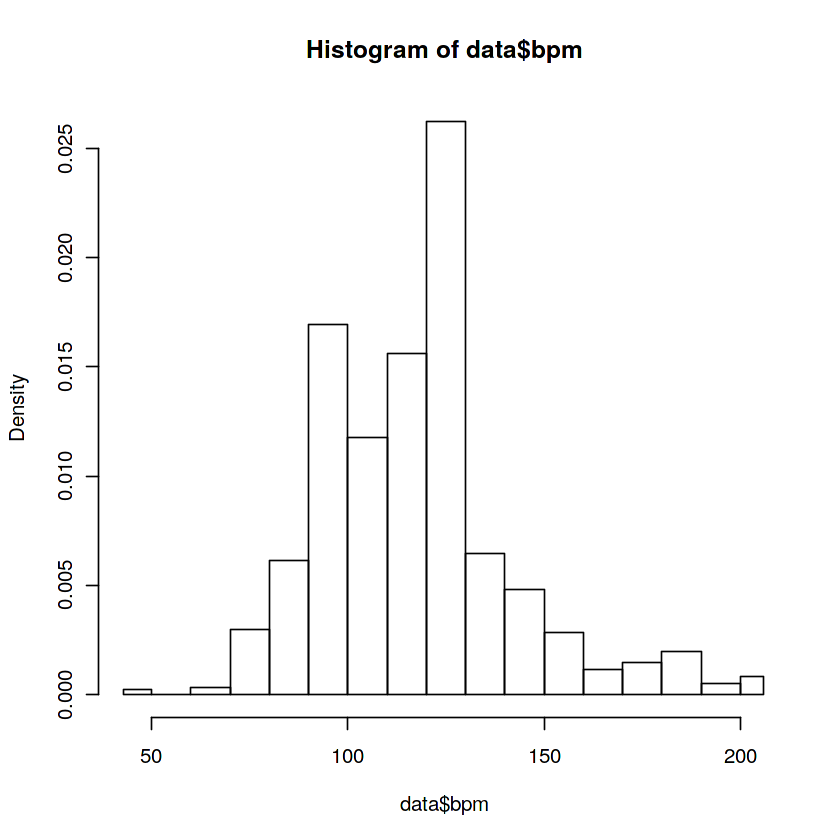

In [70]:
#Histogram zmiennej tempa utworów, po doborze przedziałów co 10bpm za wyjątkiem skrajnych wartości

hist(data$bpm, breaks = c(43,50,60,70,80,90,100,110,120,130,140,150,160,170,180,190,200,206),)

#najczesniej wystepujące dokładne wartości bpm i ile razy występują:
bpms <- data[["bpm"]]
bpms <- sort(table(bpms),decreasing=TRUE)[1:10]
bpms



In [71]:
#dynamika (głośność) utworu - wartości statystyki opisowej
min(data$dB)
max(data$dB)
mean(data$dB)
median(data$dB)
quantile(data$dB)
sd(data$dB)
skewness(data$dB)
kurtosis(data$dB)

#Widać że większość rozkładu jest skupiona w okolicach średniej (połowa wartości miedzy -6 i -4), jest nachylone w prawo i ma wysoką kurtozę. Cechuje się natomiast niskim odchyleniem standardowym, wartości nie różnią się liczbowo o wiele.

[1] -15

[1] -2

[1] -5.488372

[1] -5

0%  25%  50%  75% 100% 
 -15   -6   -5   -4   -2

[1] 1.704657

[1] -0.9840656

[1] 5.345474


-15 -13 -12 -11 -10  -9  -8  -7  -6  -5  -4  -3  -2 
  1   1   1   4   7  16  29  86 127 150 125  50   5 

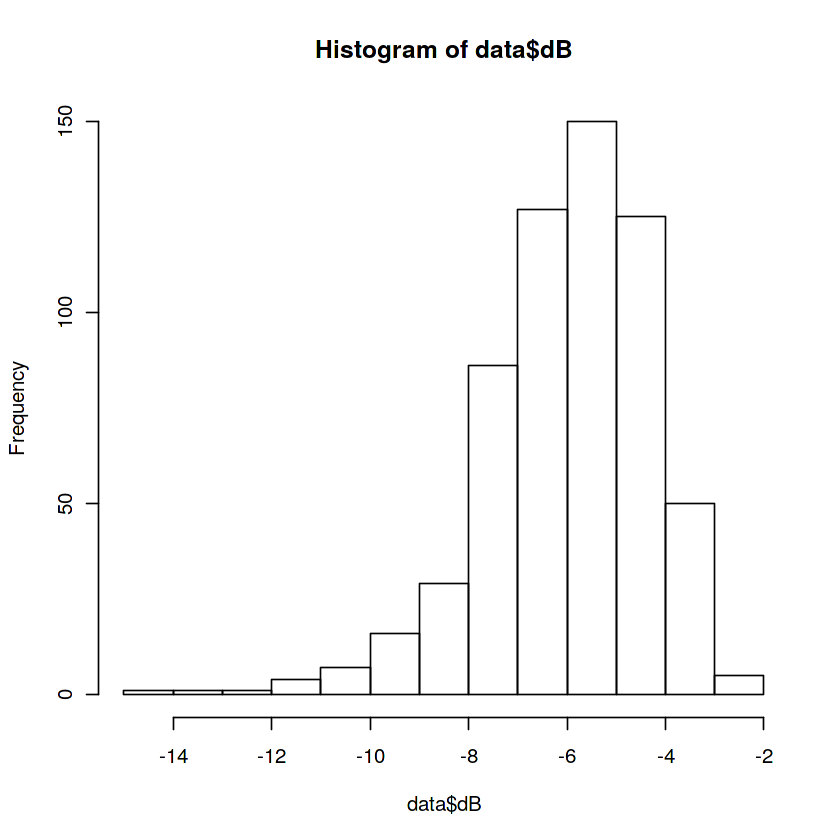

In [72]:
#szereg rozdzielczy oraz histogram głośności utworów.
table(data$dB)
hist(data$dB)

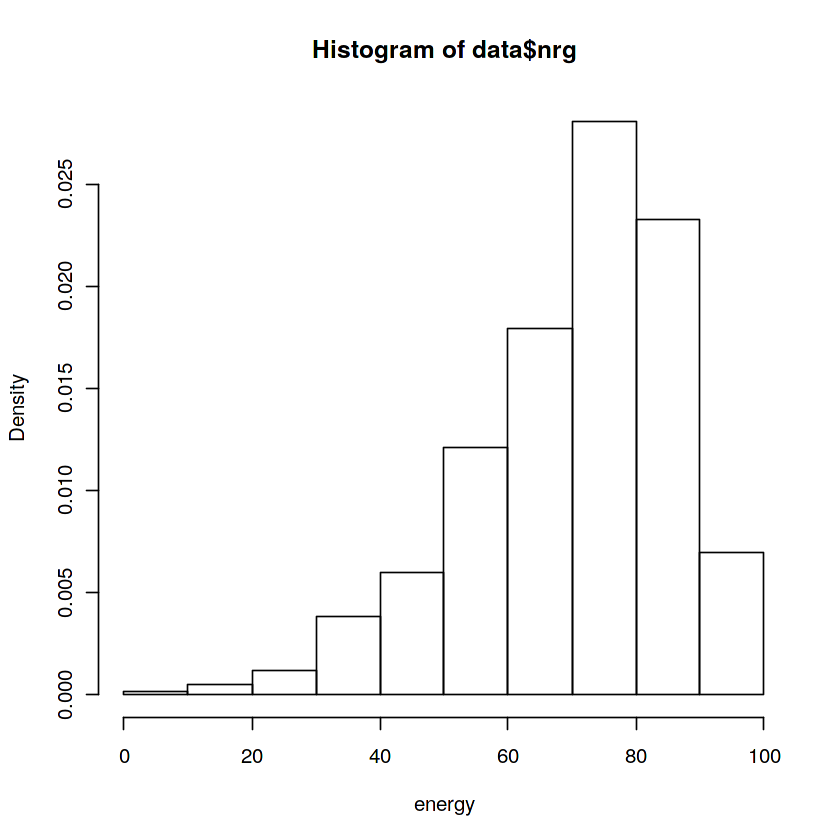

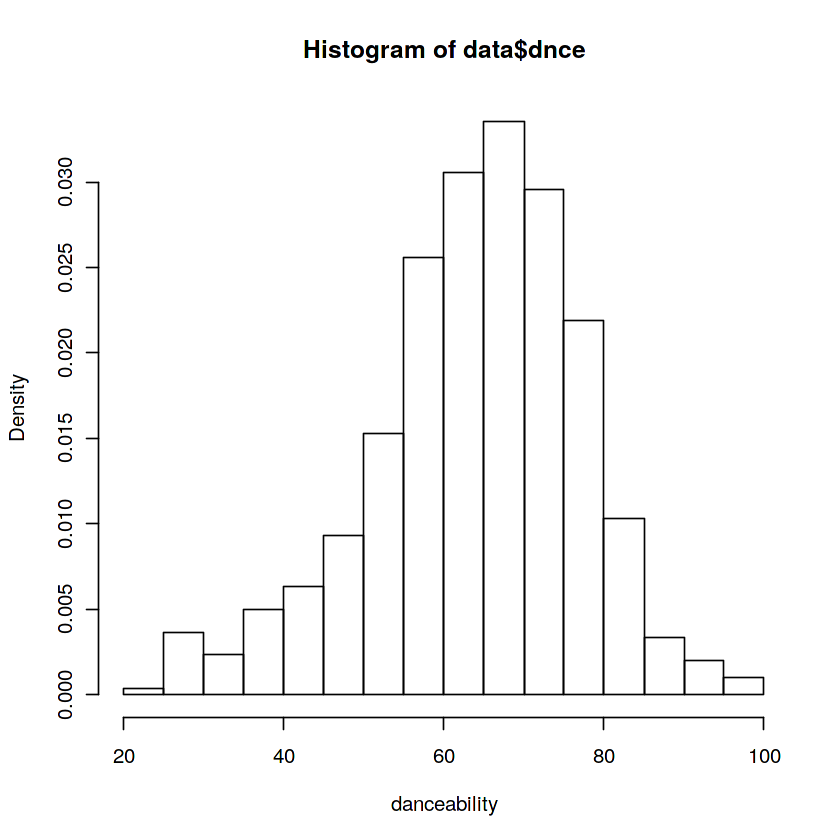

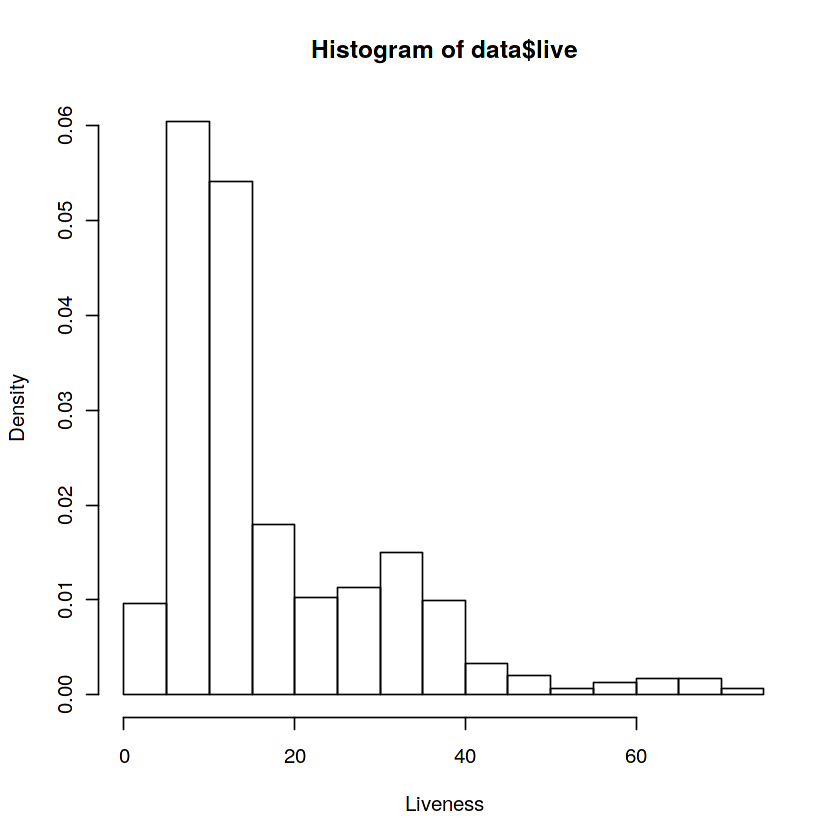

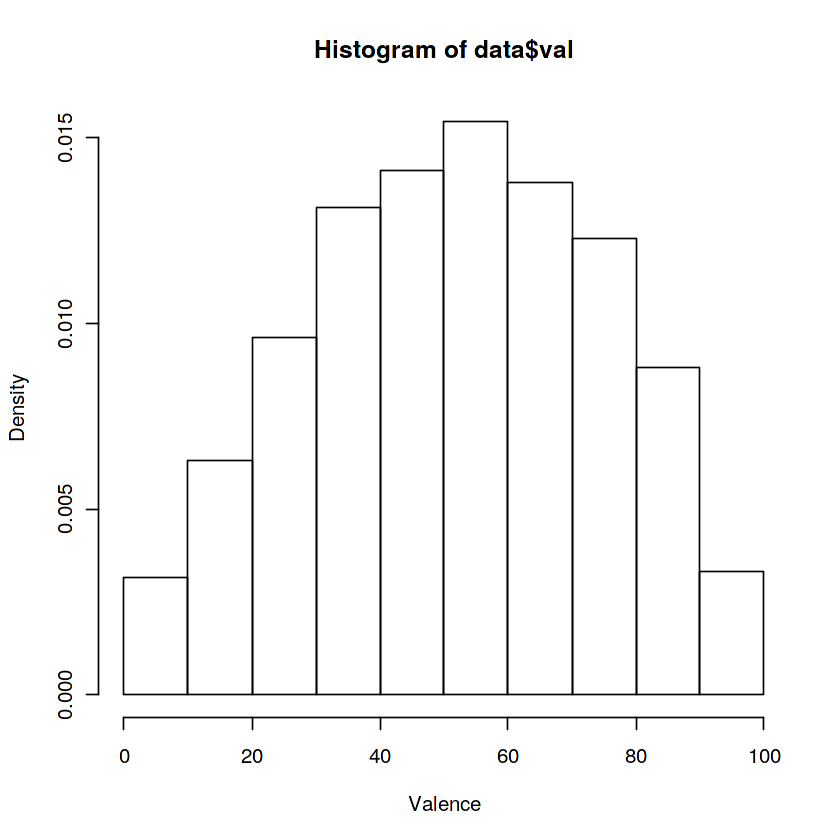

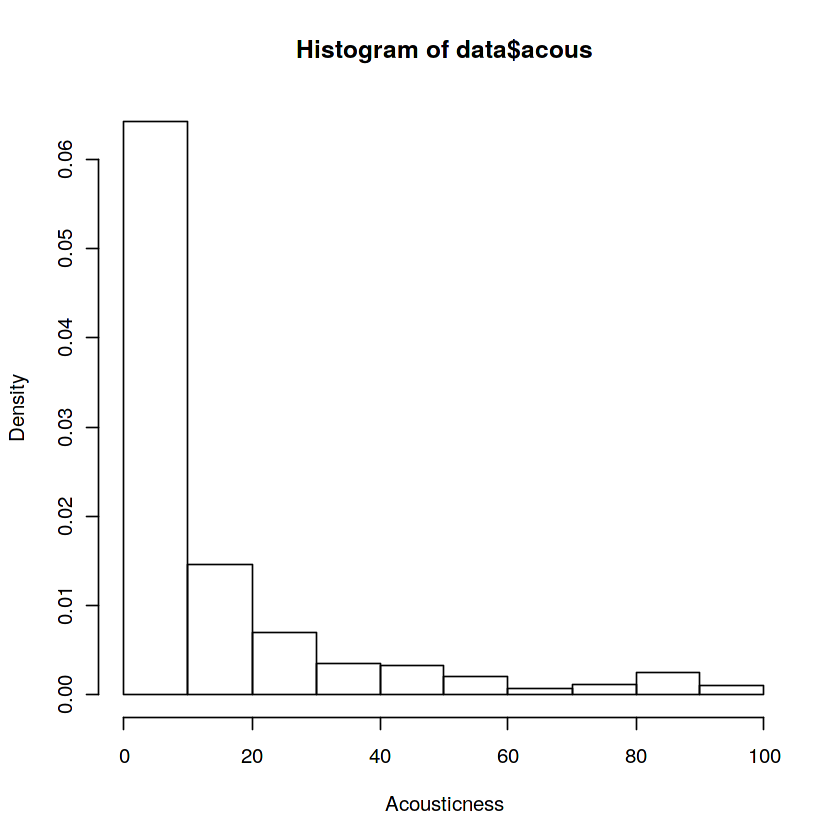

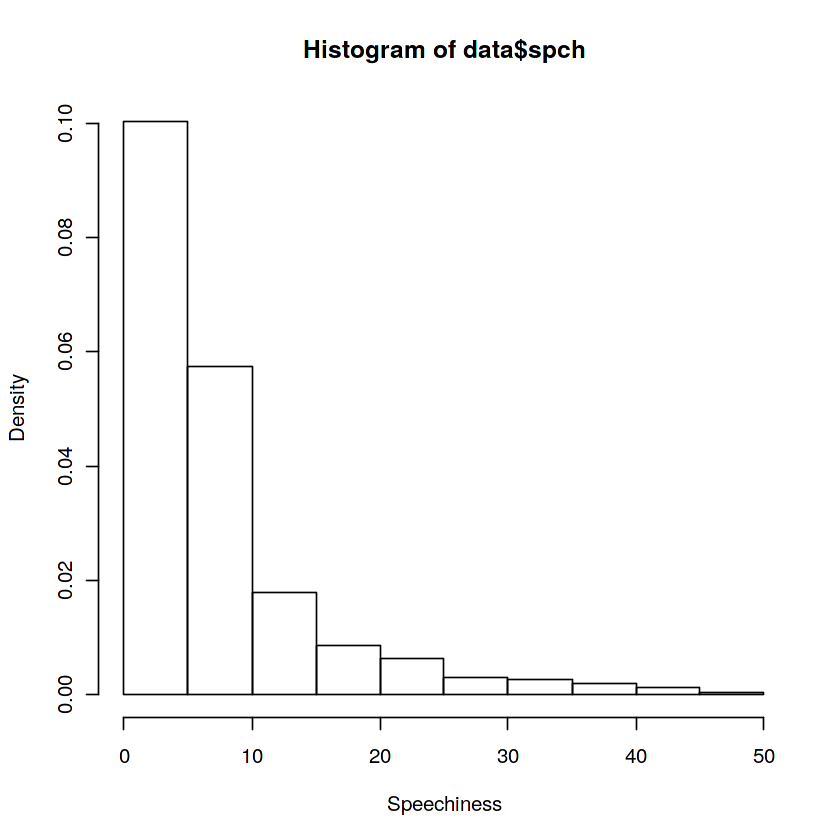

In [73]:
#statystyki wykorzystujące algorytm spotify to wartości z zakresu <0,100> dlatego świetnie sprawdza się w nich histogram z domyślnymi przedziałami
hist(data$nrg, freq = FALSE, xlab = "energy" )
hist(data$dnce, freq = FALSE, xlab = "danceability")
hist(data$live, freq = FALSE, xlab = "Liveness")
hist(data$val, freq = FALSE, xlab = "Valence")
hist(data$acous, freq = FALSE, xlab = "Acousticness")
hist(data$spch, freq = FALSE, xlab = "Speechiness")

,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
year,1.00000000,-0.101932410,-0.22529556,0.08527208,-0.17909376,-0.13535237,-0.120510449,-0.21545795,0.102410515,0.005789470,0.24984077
bpm,-0.10193241,1.000000000,0.09507031,-0.17633102,0.04881749,0.07228434,-0.002491784,-0.02938141,-0.121117530,0.051147757,-0.01812839
nrgy,-0.22529556,0.095070311,1.00000000,0.13738205,0.66362329,0.18007365,0.400945330,-0.14539881,-0.576506537,0.100965180,-0.09369345
dnce,0.08527208,-0.176331018,0.13738205,1.00000000,0.12973696,-0.04051220,0.494927998,-0.17979382,-0.250559655,-0.037757367,0.08239361
dB,-0.17909376,0.048817489,0.66362329,0.12973696,1.00000000,0.06257379,0.342983408,-0.16841473,-0.349600386,-0.061266916,0.01440024
live,-0.13535237,0.072284342,0.18007365,-0.04051220,0.06257379,1.00000000,0.015080539,0.09864458,-0.099916954,0.141946756,-0.08777029
val,-0.12051045,-0.002491784,0.40094533,0.49492800,0.34298341,0.01508054,1.000000000,-0.26317469,-0.252935836,0.118354778,0.02174557
dur,-0.21545795,-0.029381407,-0.14539881,-0.17979382,-0.16841473,0.09864458,-0.263174693,1.00000000,0.091917143,0.054747177,-0.10570654
acous,0.10241052,-0.121117530,-0.57650654,-0.25055966,-0.34960039,-0.09991695,-0.252935836,0.09191714,1.000000000,0.001482513,0.02183701
spch,0.00578947,0.051147757,0.10096518,-0.03775737,-0.06126692,0.14194676,0.118354778,0.05474718,0.001482513,1.000000000,-0.05095561


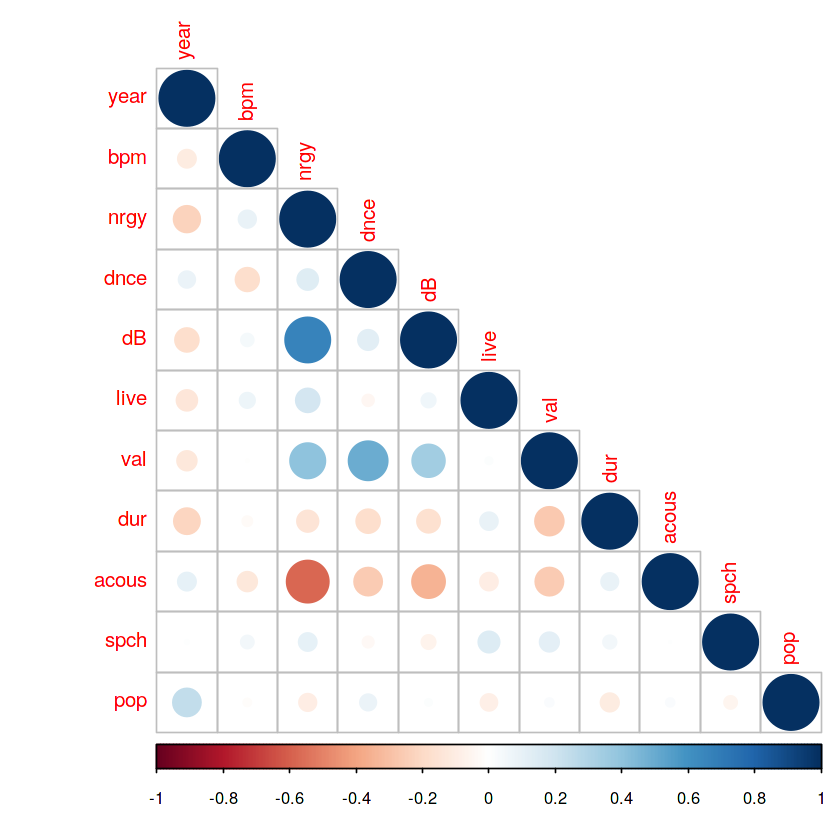

In [74]:
#tabela korelacji z liczbowymi parametrami utworów
cor(data[,5:15])
library(corrplot)
corrplot(cor(data[,5:15]), type = "lower")

In [75]:
#Najwyraźniejsze korelacje dodatnie - głośność utworu z jego energicznością (0.66), pozytywny nastrój z tanecznością (0.49), popularność z rokiem wydania (0.24)
#Najwyraźniejsze korelacje ujemne - akustyczność z energicznością (-0.57), akustyczność z głośnością (-0.34), a także co bardziej interesujące - rok wydania z długością utworu (-0.21) i energicznością (-0.22)

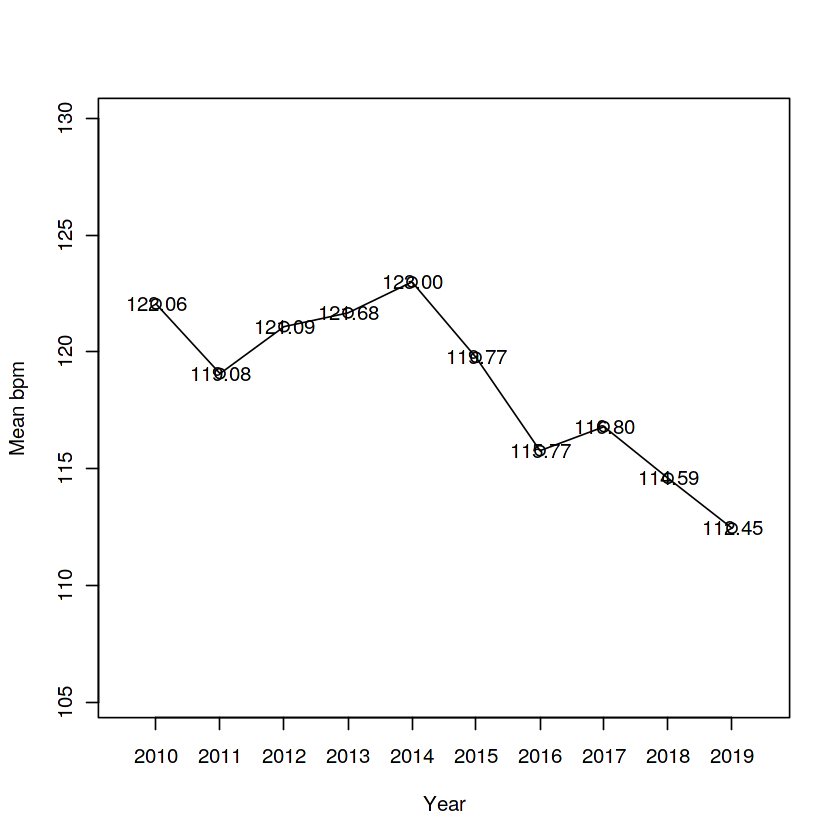

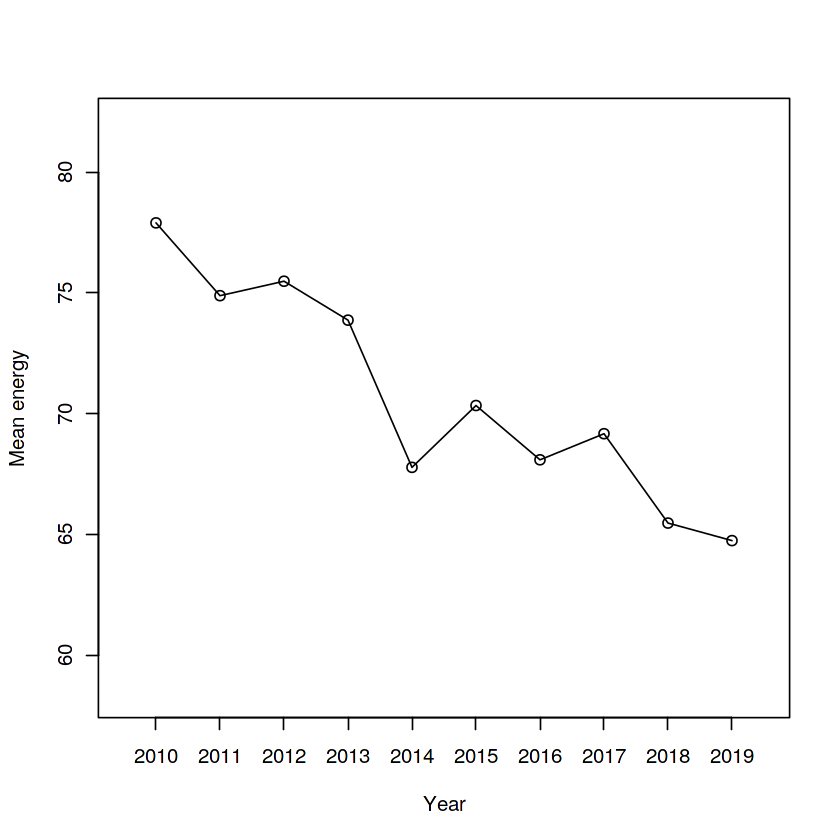

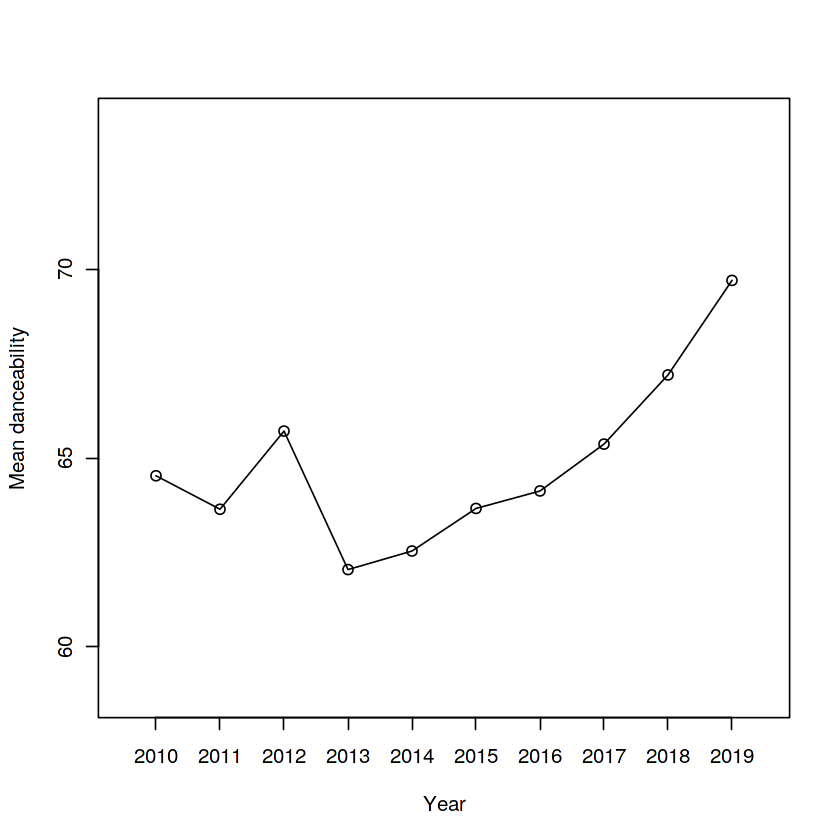

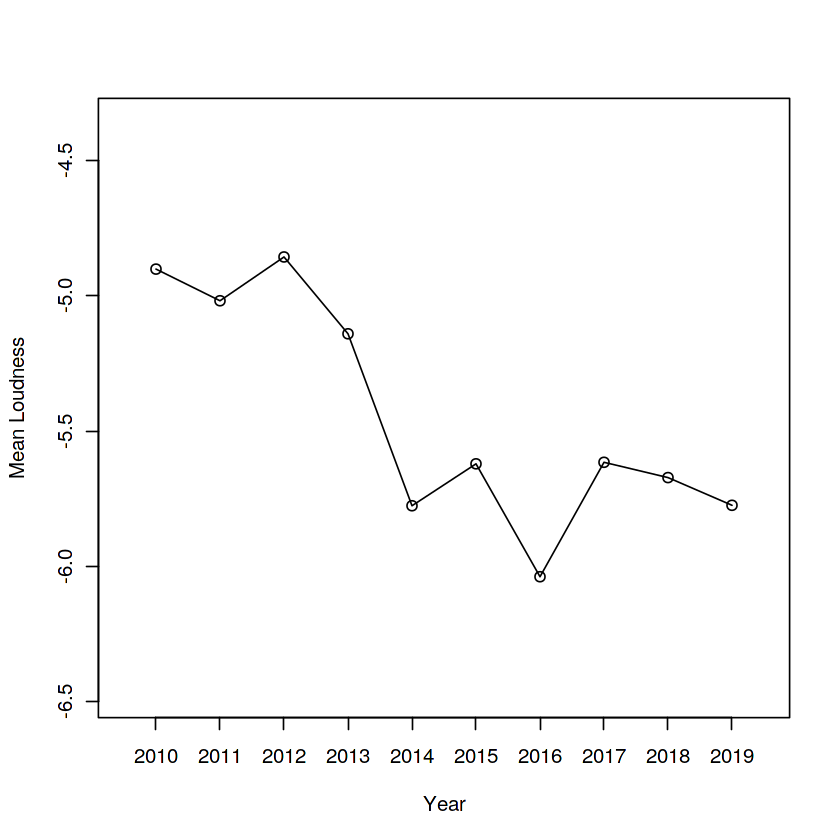

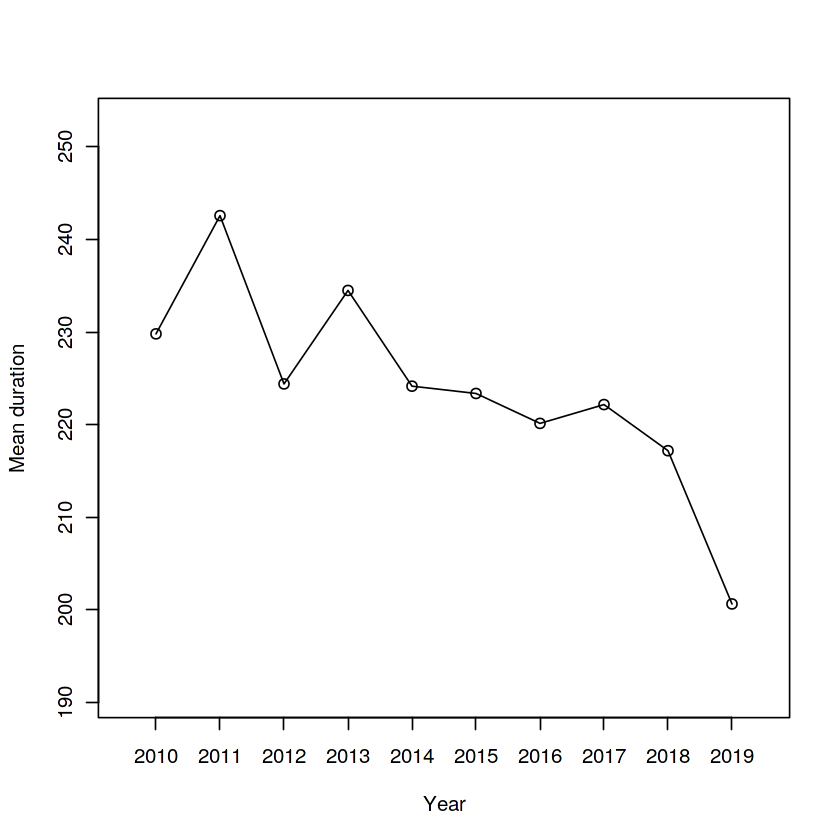

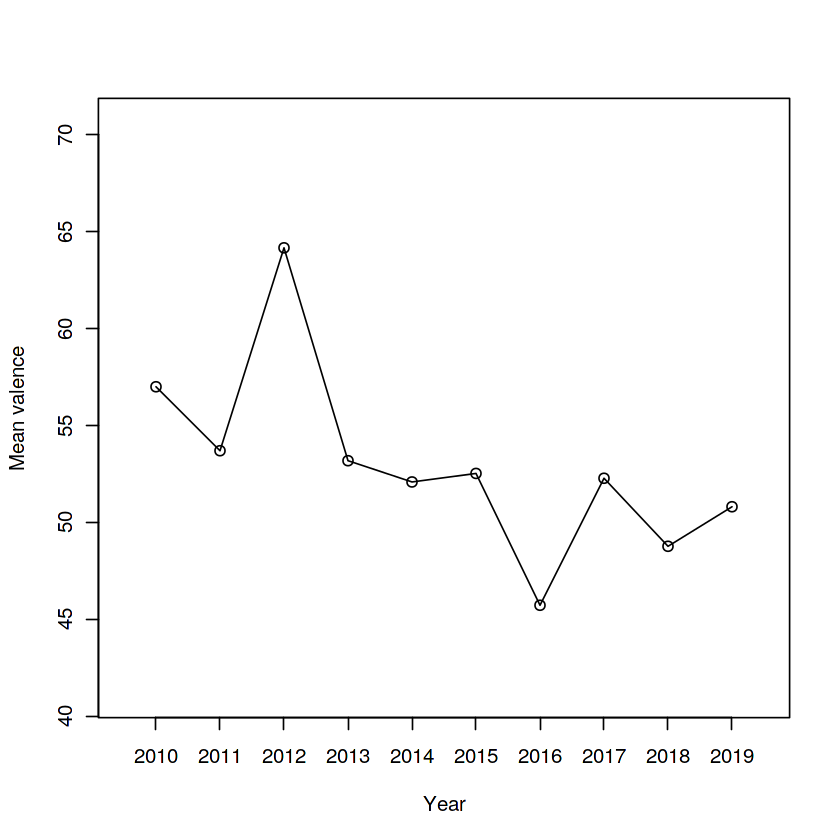

In [76]:
#Zmieniające się trendy w muzyce popularnej na przestrzeni dekady - zależności parametrów od roku wydania


library(gplots)
library(ggplot2)

plotmeans(data$bpm ~ data$year, mean.labels = TRUE, digits = 2, n.label = FALSE, barcol = 'white', xlab = "Year", ylab = "Mean bpm")


plotmeans(data$nrg ~ data$year, n.label = FALSE, barcol = 'white', xlab = "Year", ylab = "Mean energy")

plotmeans(data$dnc ~ data$year, n.label = FALSE, barcol = 'white', xlab = "Year", ylab = "Mean danceability")

plotmeans(data$dB ~ data$year, n.label = FALSE, barcol = 'white', xlab = "Year", ylab = "Mean Loudness")

plotmeans(data$dur ~ data$year, n.label = FALSE, barcol = 'white', xlab = "Year", ylab = "Mean duration")

plotmeans(data$val ~ data$year, n.label = FALSE, barcol = 'white', xlab = "Year", ylab = "Mean valence")


In [77]:
#Wnioski------
#W ubiegłej dekadzie z czasem wyraźnie malało średnie tempo utworów oraz ich energiczność, przy nieznacznym wzroście taneczności - co ma związek z trendami w muzyce i całej kulturze.
#Jeszcze ciekawsze są natomiast drastyczne spadki średniej długości utworów oraz głośności - tutaj przyczyny są raczej ekonomiczne związane z rewolucją streamingową. Bardziej opłaca się wydawać krótsze utwory (chociaż aspekt braku czasu w dzisiejszym świecie może również mieć wpływ), a automatyczne dostosowywanie głośności wprowadzone na większości platform w ostatnich latach sprawia, że nie opłaca się tzw "loudness war" - produkcja muzyki najgłośniej jak to tylko możliwe, co miało miejsce jeszcze kiedyś.
#Spore wahania występowały również w średnim nastroju utworów - zdecydowanie najweselsze hity przypadły na rok 2012, a najsmutniejsze w 2016.

In [102]:
# Testy statystyczne ------------------------
# Wybór zbioru danych, który jest bilbioteką 30 utworów pewnego użytkownika serwisu. Użytkownik analizuje swój zbiór i stawia hipotezy.

zbior <- data[c(5, 22, 43, 67, 101, 112, 115, 116, 169, 194, 201, 220, 223, 253, 264, 308, 321, 341, 367, 370, 384, 404, 441, 482, 508, 540, 564, 581),]
zbior

,X,title,artist,top.genre,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
,<int>,<fct>,<fct>,<fct>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
5,5,Just the Way You Are,Bruno Mars,pop,2010,109,84,64,-5,9,43,221,2,4,78
22,22,Whataya Want from Me,Adam Lambert,australian pop,2010,186,68,44,-5,6,45,227,1,5,66
43,43,Hard,Rihanna,barbadian pop,2010,182,75,31,-4,65,16,251,1,11,57
67,67,Party Rock Anthem,LMFAO,dance pop,2011,130,74,75,-4,27,35,262,2,16,72
101,101,Moment 4 Life - Album Version (Edited),Nicki Minaj,dance pop,2011,130,88,50,-4,22,37,279,39,38,28
112,112,Love You Like A Love Song,Selena Gomez & The Scene,dance pop,2012,117,68,86,-4,7,92,188,8,5,76
115,115,Stronger (What Doesn't Kill You),Kelly Clarkson,dance pop,2012,116,94,56,-4,11,68,222,5,5,74
116,116,Try,P!nk,dance pop,2012,104,63,67,-7,9,55,248,0,3,74
169,169,Let Me Love You (Until You Learn To Love Yourself),Ne-Yo,dance pop,2013,125,68,66,-7,37,25,252,25,4,70


In [103]:

# Test statystyczny 1. Użytkownikowi wydaje się że średnie tempo wszystkich utworów z danych może być wyższe, ponieważ średnia utworów które słucha wyszła znacznie wyższa 
#H0 średnie tempo = 118,75 (hipoteza prawdziwa)
#h1 średnie tempo > 118,75
alpha <- 0.01
nrow(zbior)
n <- nrow(zbior)
stdev <- sd(data$bpm)
T <- (mean(zbior$bpm) - mean(data$bpm)) / stdev * sqrt(n)
T
qt(alpha, n - 1)

abs(T) > abs(qt(alpha, n-1))
#Wartość statystyki jest większa od wartości krytyczcnej, czyli hipoteza h0 zostaje odrzucona. Popełniono zatem błąd I rodzaju, okazało się zbiór utworów użytkownika był niereprezentatywny dla ogólnej bazy - jego gust cechował się szybszymi kawałkami.

[1] 28

[1] 2.983165

[1] -2.47266

[1] TRUE

In [ ]:
#Test statystyczny 2. Użytkownikowi wydaje się, że średnia długość utworów może być krótsza niż podana rzeczywista.
#H0 średnia długość = 224.67 sekundy (hipoteza prawdziwa)
#h1 średnia długość < 224.67 sekundy

alpha <- 0.01
n <- nrow(zbior)
stdev <- sd(data$dur)
T <- (mean(zbior$dur) - mean(data$dur)) / stdev * sqrt(n)
T
qt(alpha, n - 1)
abs(T) > abs(qt(alpha, n-1))
#wartość statystyki testowej nie przekracza wartośi krytycznej. Hipoteza h0 nie zostaje odrzucona.


In [96]:
#Test statystyczny 3. Tym razem użytkownik usłyszał na forum, że średnia głośność najpopularniejszych utworów w ostatniej dekadzie spadła aż do -6 dB, postanowił zakwestionować to na podstawie swojej biblioteki, która wydawała mu się głośniejsza
#H0 średni poziom dB = -6 (hipoteza fałszywa)
#H1 średni poziom dB > -6

alpha <- 0.01
n <- nrow(zbior)
stdev <- sd(data$dB)
T <- (mean(zbior$dB) - (-6)) / stdev * sqrt(n)
T
qt(alpha, n - 1)
abs(T) > abs(qt(alpha, n-1))
mean(zbior$dB)
mean(data$dB)
#Wartość statystyki jest większa od wartości krytyczcnej, czyli hipoteza h0 zostaje odrzucona. Słusznie, ponieważ średnia głośność była trochę większa niż usłyszał na forum (-5,48, a nie -6)

[1] 4.101907

[1] -2.47266

[1] TRUE

[1] -4.678571

[1] -5.488372